# Census Income Project

This dataset contains list of people with different marital status, sex, employment and so on. Prediction task is to determine whether a person makes over 50K a year. This is a classification problem.

Source: UCI Machine Learning Repository

# Import libraries

In [1]:
# Data processing
import pandas as pd

# Linear algebra
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

# Data exploration and preprocessing

In [2]:
# Loading data

data = pd.read_csv('adult.csv', na_values='?')

In [3]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
# Getting rid of whitespaces

data.columns = data.columns.str.strip()

In [6]:
# Changing column names

data.rename(columns={'age':'Age','workclass':'Workclass', 'fnlwgt':'Final weight','education':'Education',
                     'education.num':'Education years', 'marital.status':'Marital status', 
                     'occupation':'Occupation','relationship':'Relationship','race':'Race', 
                     'sex':'Sex', 'capital.gain':'Capital gain', 'capital.loss':'Capital loss', 'hours.per.week':'Hours per week',
                     'native.country':'Country of origin','income':'Income'}, inplace=True)

In [7]:
data.columns

Index(['Age', 'Workclass', 'Final weight', 'Education', 'Education years',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital gain', 'Capital loss', 'Hours per week', 'Country of origin',
       'Income'],
      dtype='object')

In [8]:
data.head()

,Age,Workclass,Final weight,Education,Education years,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Country of origin,Income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Our target is 'Income', rest of the columns are variables (predictors).

In [9]:
def basic_stats(df):
    '''
    Function displays shape, basic description, 
    types of data and quantity of NaN's.
    '''
    print('Data shape:\n', data.shape)
    print(60*'-')
    print()
    print('Data description:\n \n', data.describe())
    print(60*'-')
    print()
    print('Types of data:\n \n', data.dtypes)
    print(60*'-')
    print()
    print("Quantity of NaN's:\n \n", data.isnull().sum())
    print(60*'-')
    
basic_stats(data)

Data shape:
 (32561, 15)
------------------------------------------------------------

Data description:
 
                 Age  Final weight  Education years  Capital gain  \
count  32561.000000  3.256100e+04     32561.000000  32561.000000   
mean      38.581647  1.897784e+05        10.080679   1077.648844   
std       13.640433  1.055500e+05         2.572720   7385.292085   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.178270e+05         9.000000      0.000000   
50%       37.000000  1.783560e+05        10.000000      0.000000   
75%       48.000000  2.370510e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       Capital loss  Hours per week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.

In [10]:
def prep_data(df):
    '''Function drops duplicates and NaN values
    '''
    df.dropna(inplace=True)
    df.drop_duplicates()
    print(df.isnull().sum())
prep_data(data)

Age                  0
Workclass            0
Final weight         0
Education            0
Education years      0
Marital status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital gain         0
Capital loss         0
Hours per week       0
Country of origin    0
Income               0
dtype: int64


I will take a look on the features to check type of data and category of variable. I am going to make also univariate analysis.

Basic statistics of feature:

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: Age, dtype: float64

Skewness is: 
 0.530227781834009

Kurtosis is: 
 -0.14467410750760656

Mean is: 
 38.437901995888865

Median is: 
 37.0


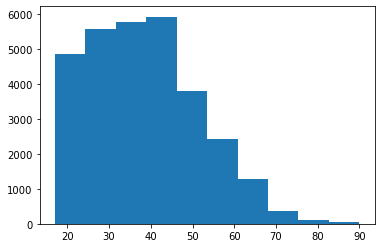

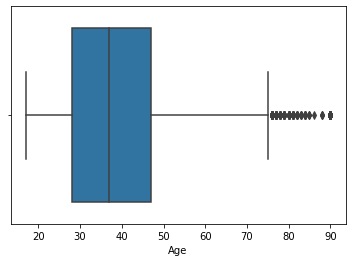

In [11]:
def features(df):
    '''
    This function display histogram and boxplot 
    and basic statistics of every feature in dataset.
    It counts skew, kurtosis, mean and median as well.
    '''   
    print('Basic statistics of feature:')
    print()
    print(df.describe())
    print()
    print('Skewness is: \n',df.skew())
    print()
    print('Kurtosis is: \n',df.kurtosis())
    print()
    print('Mean is: \n',df.mean())
    print()
    print('Median is: \n',df.median())
    plt.hist(df)
    plt.show()
    print()
    sns.boxplot(df)
    plt.show()
        
features(data['Age'])

As we can see distribution is asymetrical. Skew is positive. Looking at boxplot we can detect some outliers: Age above 75 is identified as outlier. But it is not a mistake in the data that's why I'm not going to drop them.

In [12]:
data['Workclass'].describe()

count       30162
unique          7
top       Private
freq        22286
Name: Workclass, dtype: object

We can see that most of the sample is private business activity.

In [13]:
data['Workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: Workclass, dtype: int64

In order to simplify data for algorithms I'm going to reduce number of categories by grouping them in the similar ones.

In [14]:
data['Workclass'] = data['Workclass'].replace(['State-gov', 'Federal-gov', 'Local-gov'], 'State')
data['Workclass'] = data['Workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self-emp')

In [15]:
# Dropping "Without pay" data

to_drop = data.loc[data['Workclass'] == 'Without-pay'].index

In [16]:
data.drop(to_drop, inplace=True)

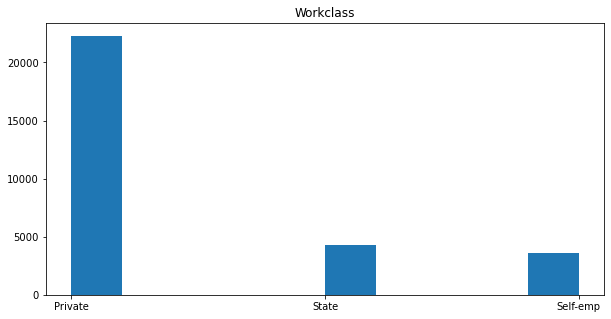

In [17]:
plt.figure(figsize=(10,5))
plt.hist(data['Workclass'])
plt.title('Workclass')
plt.show()

Variable 'Final weight' represents number of units in the target population
that the responding unit represents. I think that this variable has no effect on the explanatory variable. 
So I will drop it.

In [18]:
data.drop(columns = 'Final weight', inplace=True)

In [19]:
data.head()

,Age,Workclass,Education,Education years,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Country of origin,Income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [20]:
data['Education'].describe()

count       30148
unique         16
top       HS-grad
freq         9831
Name: Education, dtype: object

In [21]:
data['Education'].value_counts()

HS-grad         9831
Some-college    6675
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1007
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: Education, dtype: int64

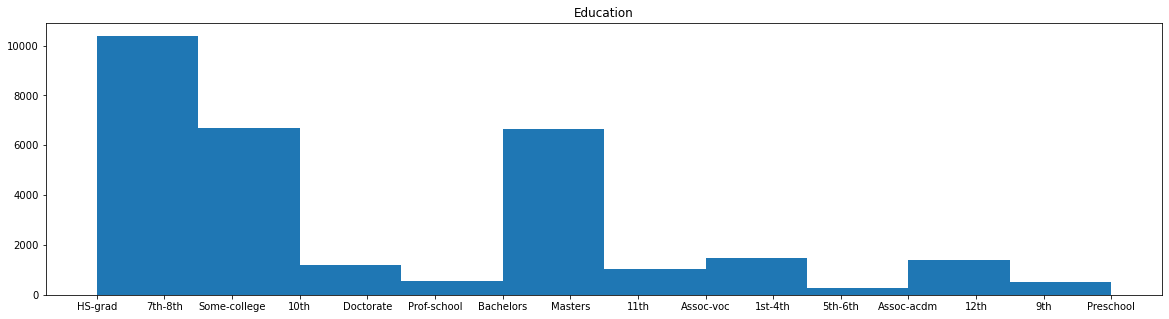

In [22]:
plt.figure(figsize=(20,5))
plt.hist(data['Education'])
plt.title('Education')
plt.show()

Basic statistics of feature:

count    30148.000000
mean        10.121799
std          2.550246
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: Education years, dtype: float64

Skewness is: 
 -0.3055327916054223

Kurtosis is: 
 0.6430890479566851

Mean is: 
 10.121799124320022

Median is: 
 10.0


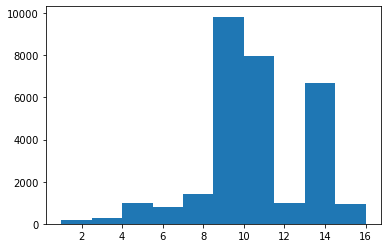

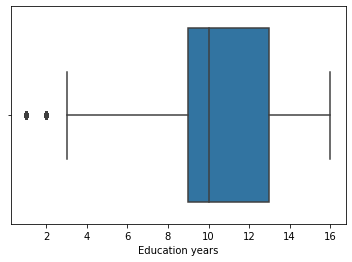

In [23]:
features(data['Education years'])

In [24]:
data['Marital status'].describe()

count                  30148
unique                     7
top       Married-civ-spouse
freq                   14057
Name: Marital status, dtype: object

In [25]:
data['Marital status'].value_counts()

Married-civ-spouse       14057
Never-married             9722
Divorced                  4214
Separated                  939
Widowed                    826
Married-spouse-absent      369
Married-AF-spouse           21
Name: Marital status, dtype: int64

I am goint to create 'Married' as one category.

In [26]:
data['Marital status'] = data['Marital status'].replace(['Married-civ-spouse', 
                                                         'Married-spouse-absent', 'Married-AF-spouse'], 'Married')

In [27]:
data['Marital status'].value_counts()

Married          14447
Never-married     9722
Divorced          4214
Separated          939
Widowed            826
Name: Marital status, dtype: int64

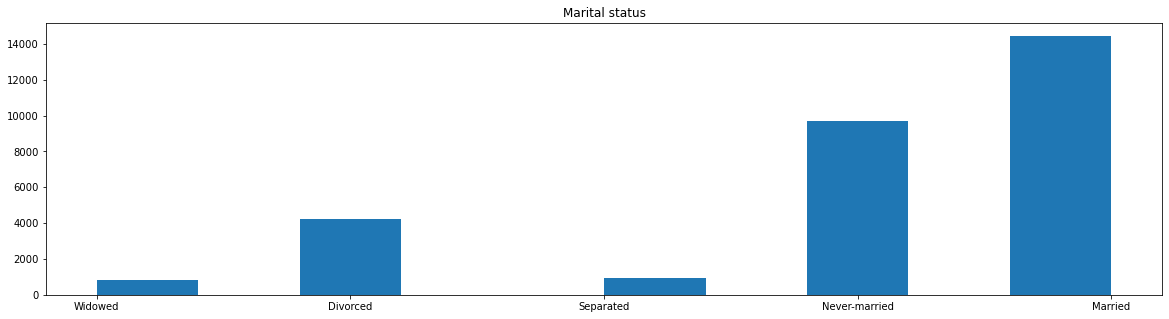

In [28]:
plt.figure(figsize=(20,5))
plt.hist(data['Marital status'])
plt.title('Marital status')
plt.show()

In [29]:
data['Occupation'].describe()

count              30148
unique                14
top       Prof-specialty
freq                4038
Name: Occupation, dtype: object

In [30]:
data['Occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4029
Exec-managerial      3992
Adm-clerical         3718
Sales                3584
Other-service        3211
Machine-op-inspct    1965
Transport-moving     1571
Handlers-cleaners    1349
Farming-fishing       983
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: Occupation, dtype: int64

I will join 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces' to one category: 'Others'.

In [31]:
data['Occupation'] = data['Occupation'].replace(['Tech-support', 'Protective-serv', 
                                                 'Priv-house-serv', 'Armed-Forces'], 'Others')

In [32]:
data['Occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4029
Exec-managerial      3992
Adm-clerical         3718
Sales                3584
Other-service        3211
Machine-op-inspct    1965
Others               1708
Transport-moving     1571
Handlers-cleaners    1349
Farming-fishing       983
Name: Occupation, dtype: int64

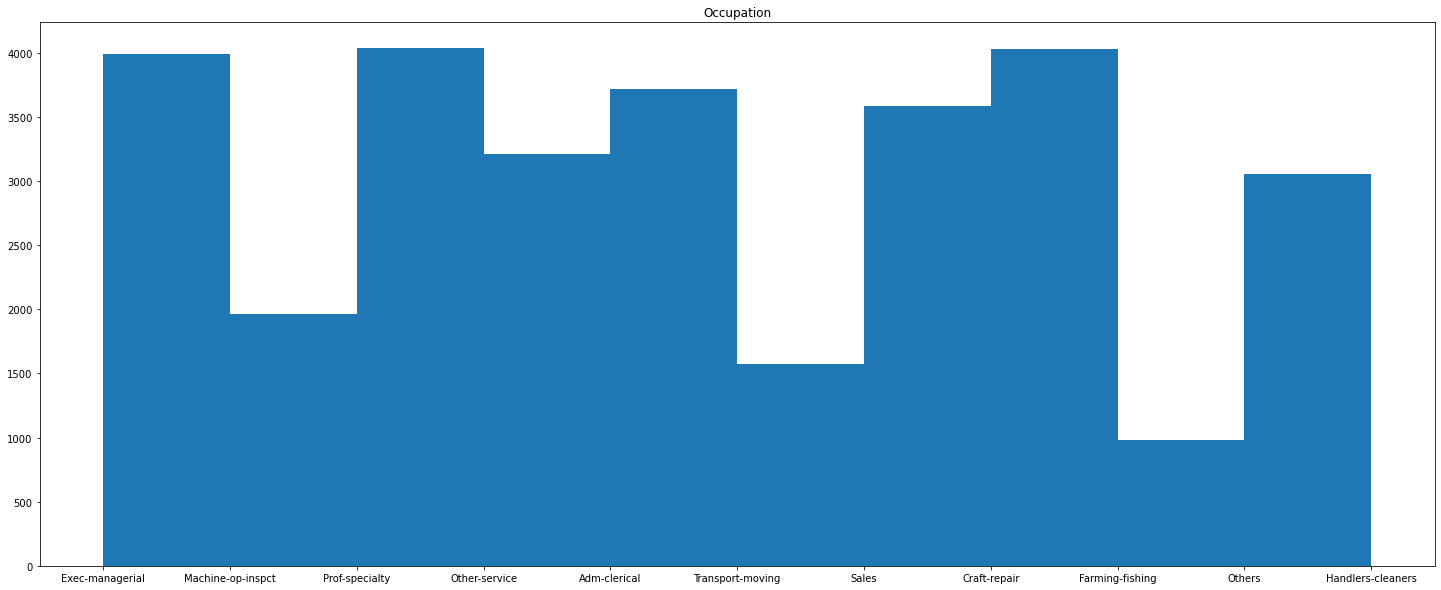

In [33]:
plt.figure(figsize=(25,10))
plt.hist(data['Occupation'])
plt.title('Occupation')
plt.show()

In [34]:
data['Relationship'].describe()

count       30148
unique          6
top       Husband
freq        12459
Name: Relationship, dtype: object

In [35]:
data['Relationship'].value_counts()

Husband           12459
Not-in-family      7726
Own-child          4461
Unmarried          3210
Wife               1403
Other-relative      889
Name: Relationship, dtype: int64

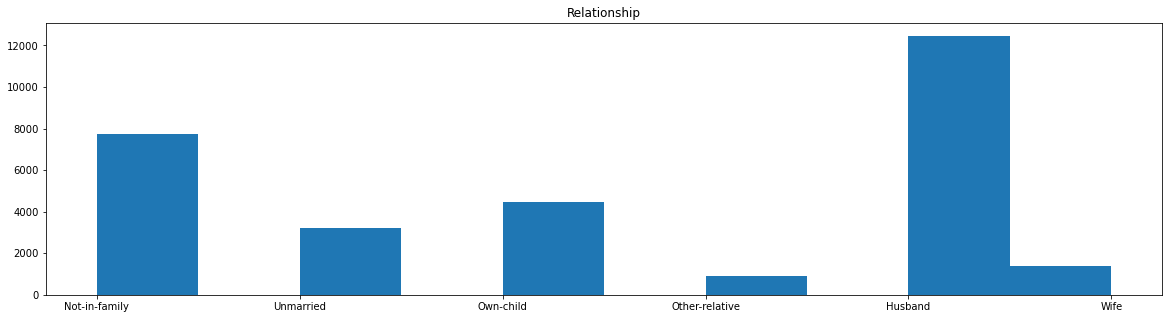

In [36]:
plt.figure(figsize=(20,5))
plt.hist(data['Relationship'])
plt.title('Relationship')
plt.show()

In [37]:
data['Race'].describe()

count     30148
unique        5
top       White
freq      25921
Name: Race, dtype: object

In [38]:
data['Race'].value_counts()

White                 25921
Black                  2816
Asian-Pac-Islander      894
Amer-Indian-Eskimo      286
Other                   231
Name: Race, dtype: int64

I will join again 'Asian-Pac-Islander', 'Amer-Indian-Eskimo' and 'Other' to simplify dataset.

In [39]:
data['Race'] = data['Race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], 'Other')

In [40]:
data['Race'].value_counts()

White    25921
Black     2816
Other     1411
Name: Race, dtype: int64

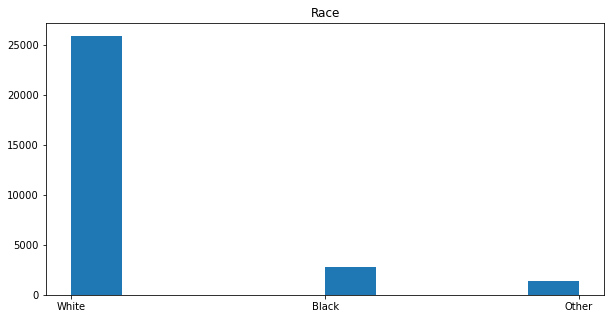

In [41]:
plt.figure(figsize=(10,5))
plt.hist(data['Race'])
plt.title('Race')
plt.show()

In [42]:
data['Sex'].describe()

count     30148
unique        2
top        Male
freq      20371
Name: Sex, dtype: object

In [43]:
data['Sex'].value_counts()

Male      20371
Female     9777
Name: Sex, dtype: int64

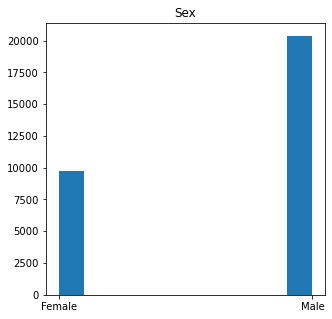

In [44]:
plt.figure(figsize=(5,5))
plt.hist(data['Sex'])
plt.title('Sex')
plt.show()

Basic statistics of feature:

count    30148.000000
mean      1092.288411
std       7408.005326
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital gain, dtype: float64

Skewness is: 
 11.900096245818698

Kurtosis is: 
 153.59699542345734

Mean is: 
 1092.2884105081598

Median is: 
 0.0


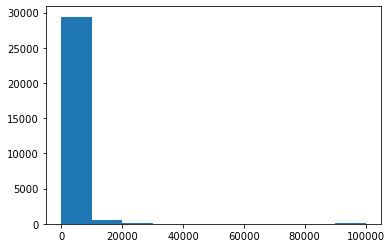

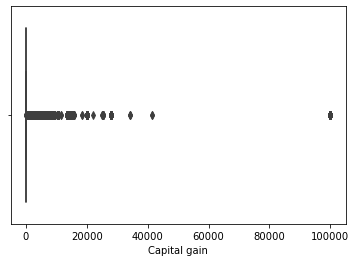

In [45]:
features(data['Capital gain'])

Basic statistics of feature:

count    30148.000000
mean        88.413527
std        404.387750
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital loss, dtype: float64

Skewness is: 
 4.5251801362678785

Kurtosis is: 
 19.499584432859635

Mean is: 
 88.41352660209633

Median is: 
 0.0


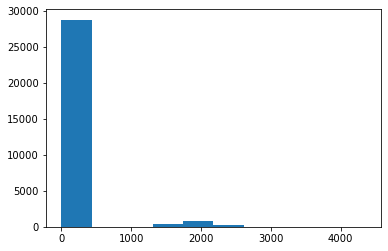

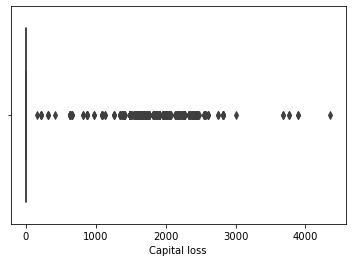

In [46]:
features(data['Capital loss'])

Basic statistics of feature:

count    30148.000000
mean        40.935054
std         11.976033
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours per week, dtype: float64

Skewness is: 
 0.33191703302676484

Kurtosis is: 
 3.173770785623612

Mean is: 
 40.93505373490779

Median is: 
 40.0


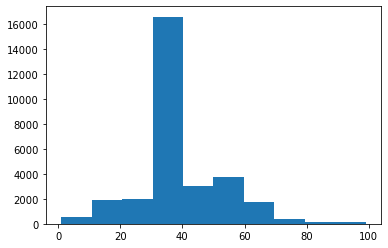

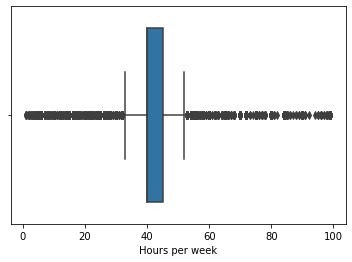

In [47]:
features(data['Hours per week'])

In [48]:
data['Country of origin'].describe()

count             30148
unique               41
top       United-States
freq              27491
Name: Country of origin, dtype: object

In [49]:
data['Country of origin'].value_counts()

United-States                 27491
Mexico                          610
Philippines                     187
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

I am going to perform bivariate analysis to find out more about the data. To chceck if there are some correlations between variables and between target and variables. But first I must convert "Income" to categorical data.

In [50]:
data['Income'].value_counts()

<=50K    22640
>50K      7508
Name: Income, dtype: int64

In [51]:
# Converting "Income" to categorical data using LabelEncoder

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Income'] = label.fit_transform(data['Income'])

In [52]:
data.head()

,Age,Workclass,Education,Education years,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Country of origin,Income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


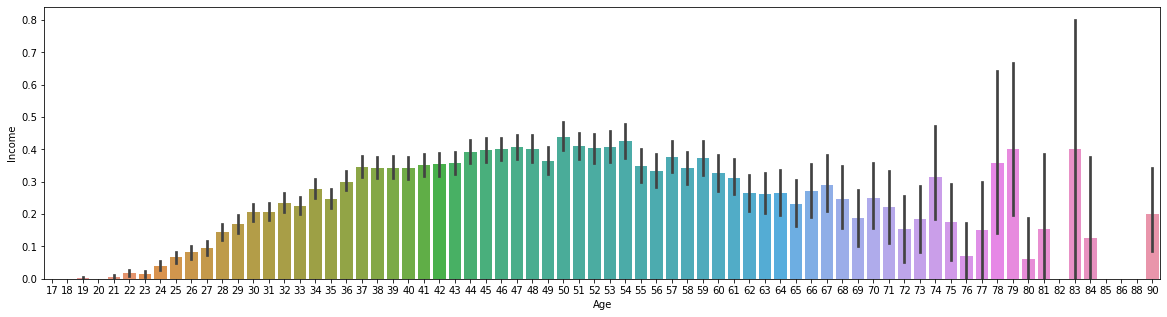

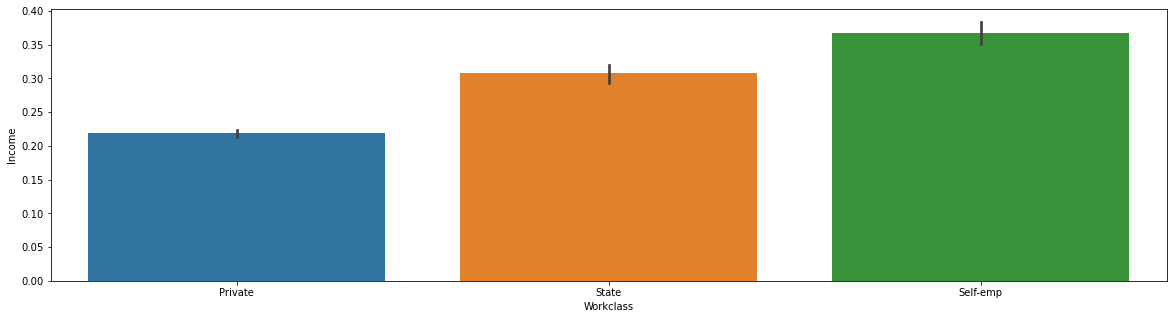

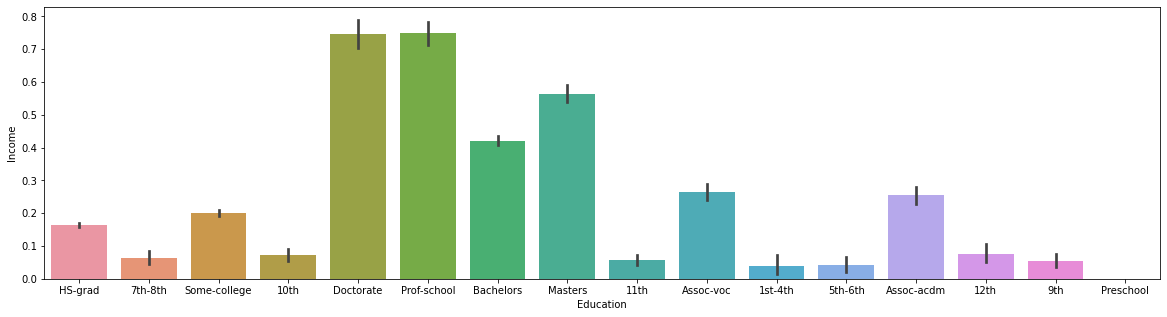

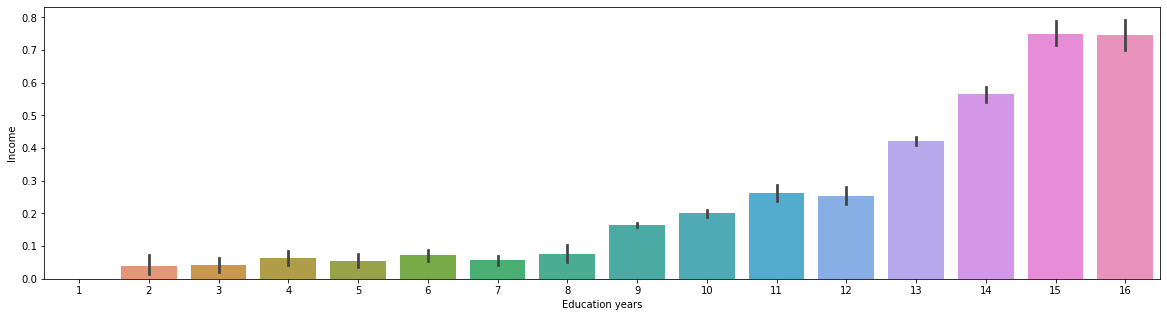

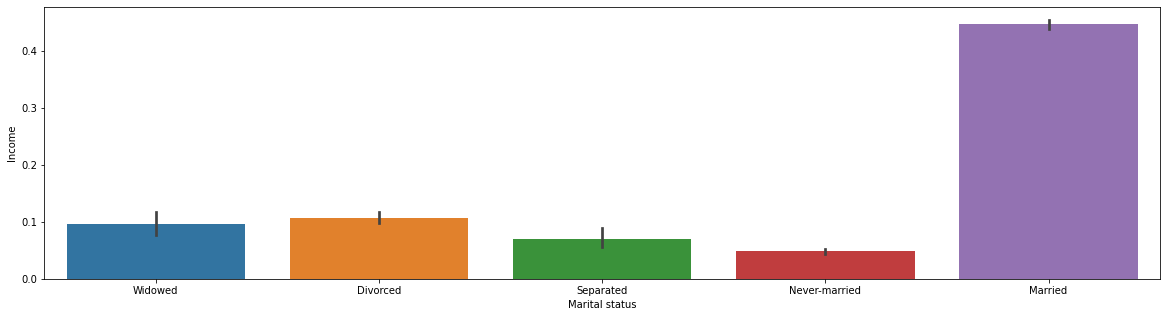

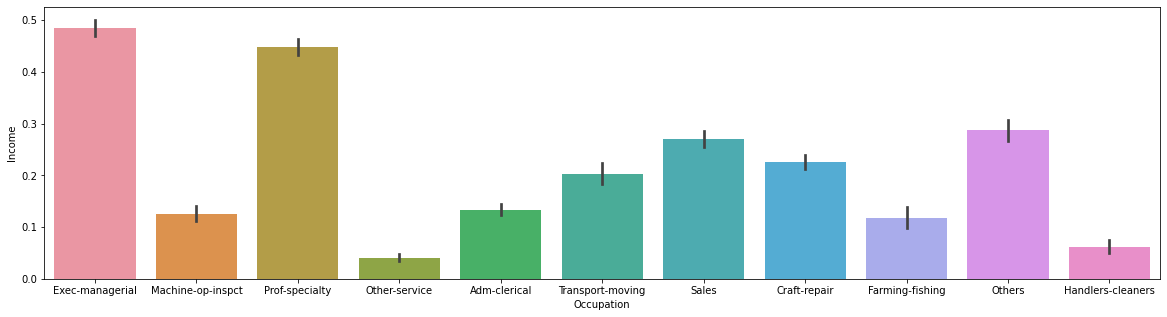

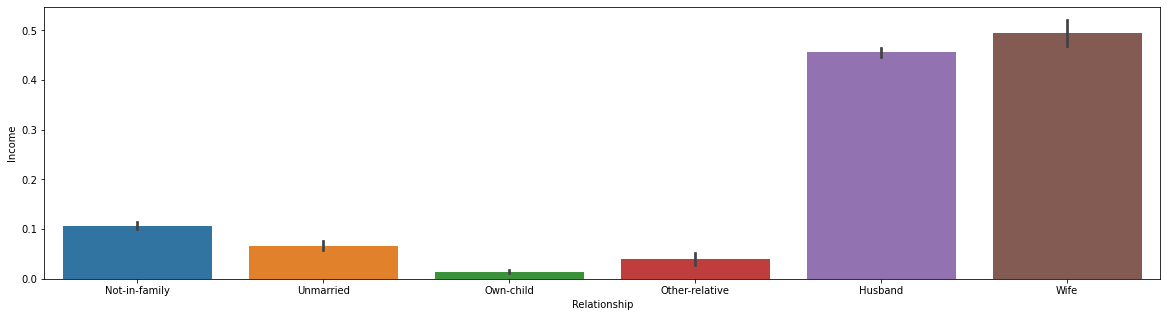

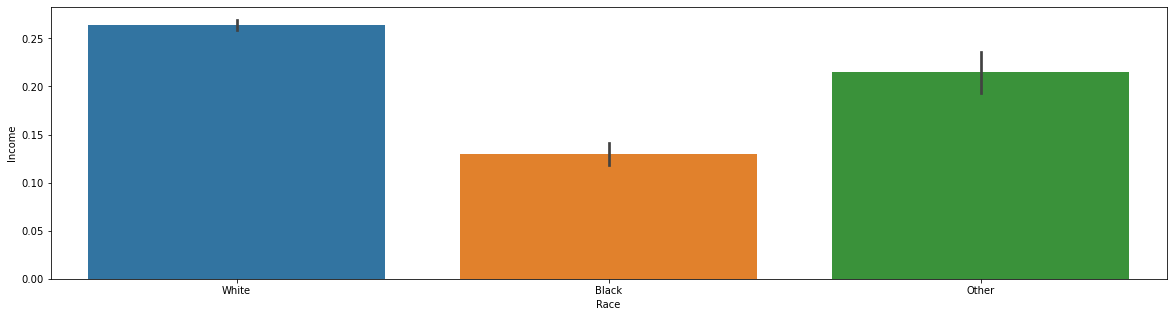

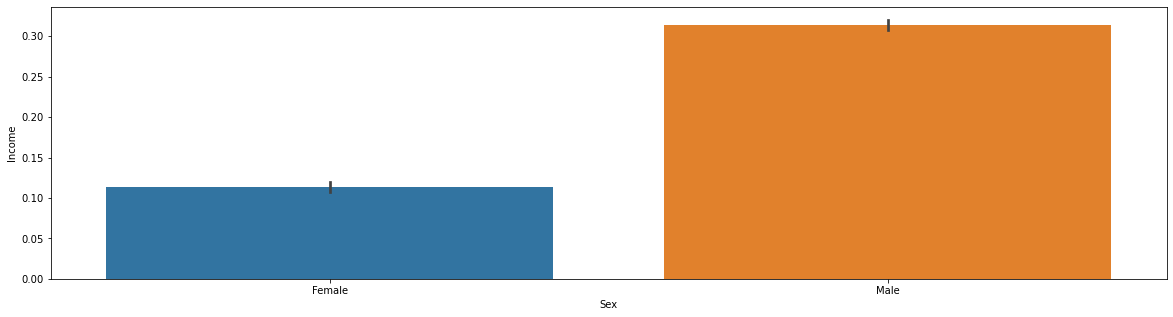

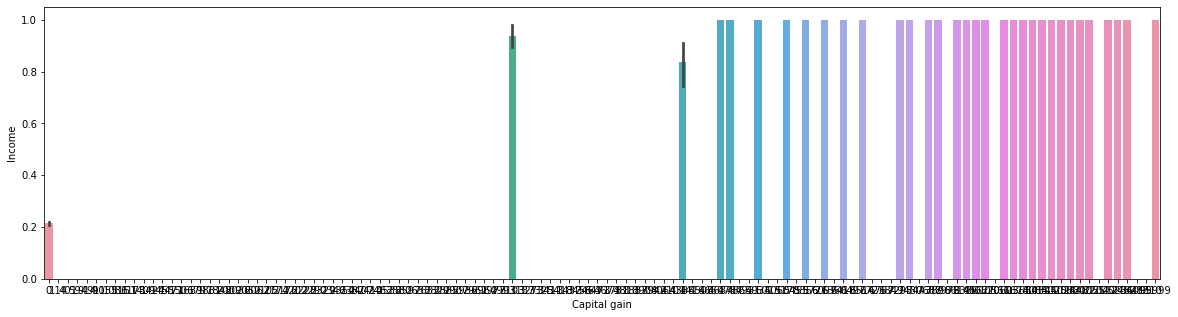

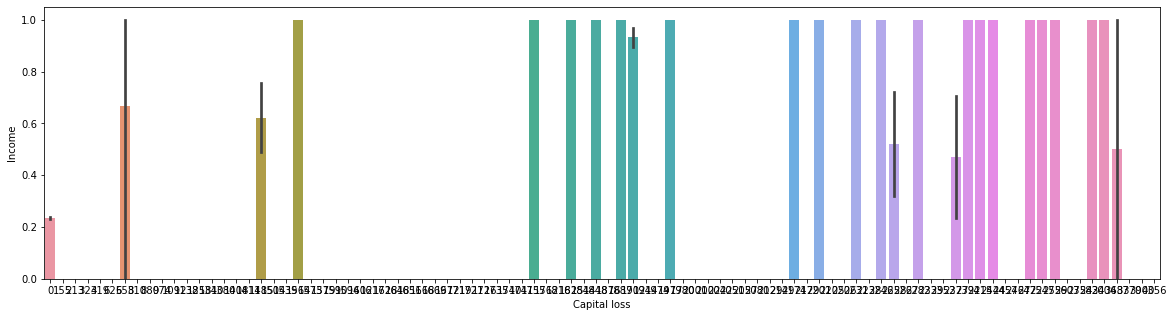

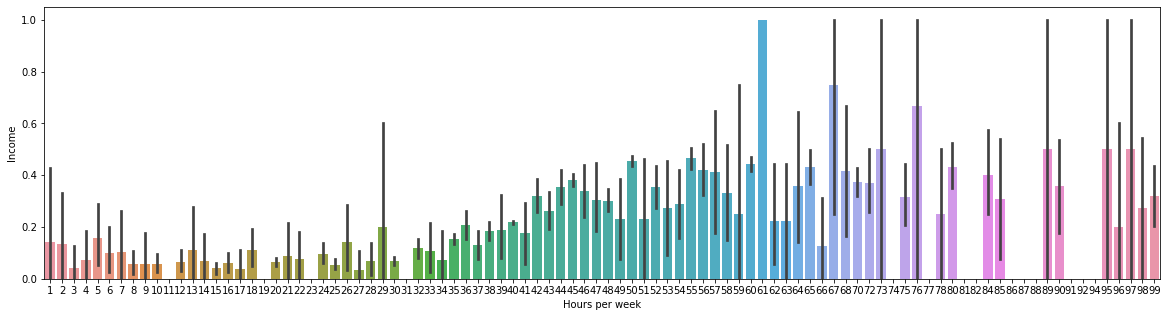

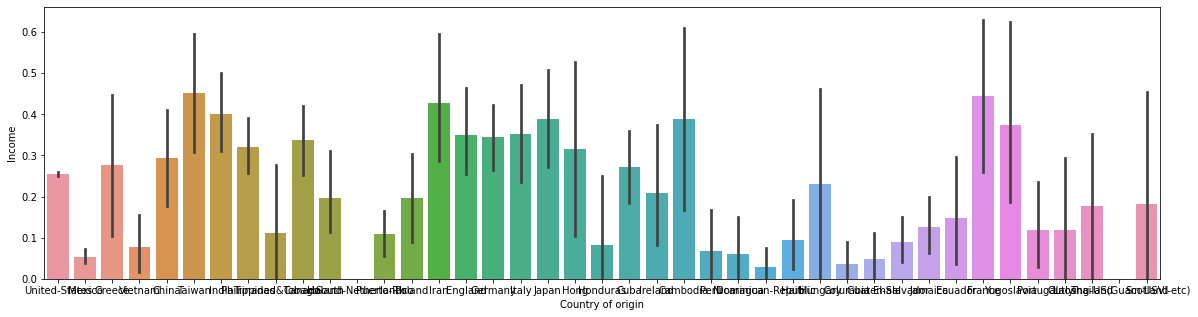

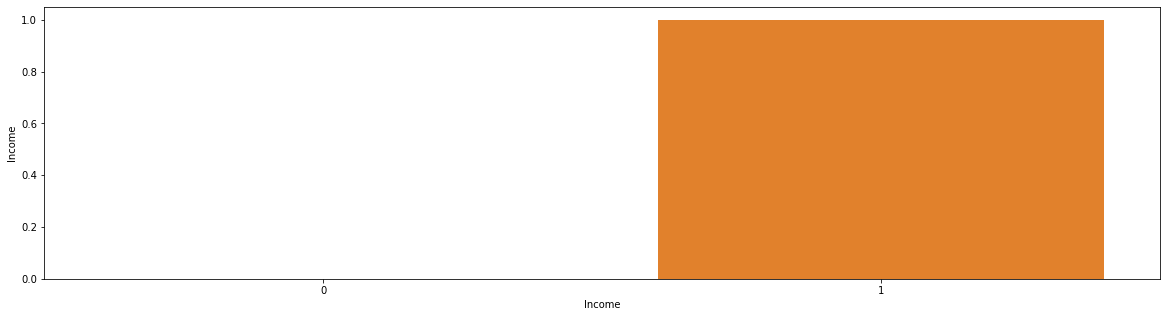

In [53]:
def charts(df):
    '''Function is using loop and iterate through all variables and display chart
    '''
    for i in df: 
        plt.figure(figsize=(20,5))
        ax = sns.barplot(x=data[i], y='Income', data=data)
        plt.show()
charts(data)

Observing these data following conclusions can be drawn:

    - people with income above 50k a year are usually between 40 and years old
    - people with bigger income are self-employed or work in private companies
    - richer people are better educated
    - richer people are usually married
    - the best paid occupations are execution managers or professors
    - the dominant race among better paid is white
    - the dominant sex among better paid is male

In [54]:
data.groupby(by='Income').mean()

,Age,Education years,Capital gain,Capital loss,Hours per week
Income,,,,,
0,36.601148,9.629461,148.684231,53.481051,39.352694
1,43.959110,11.606420,3937.679808,193.750666,45.706580


Richer people work longer by average.

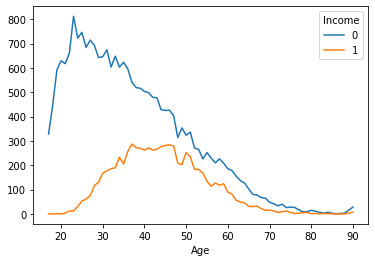

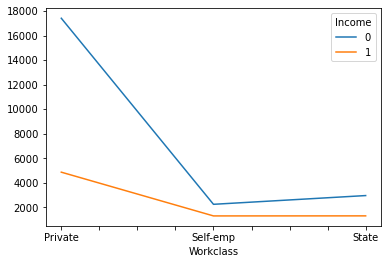

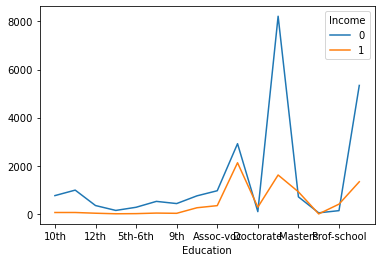

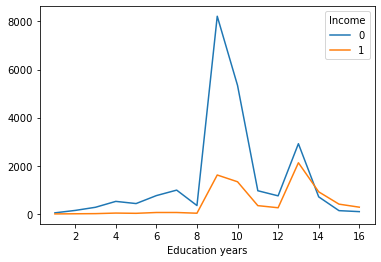

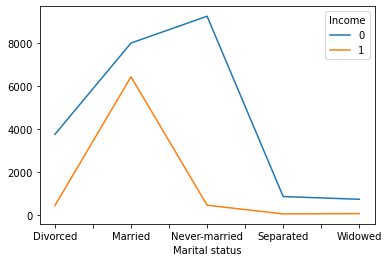

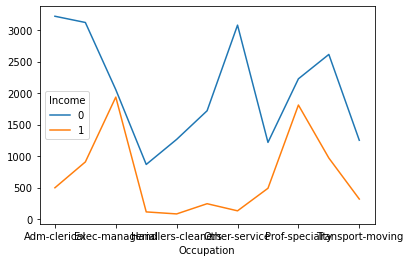

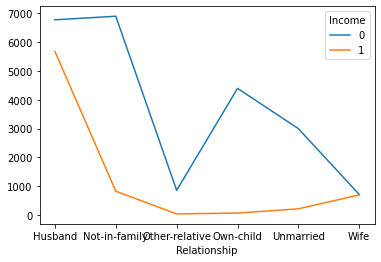

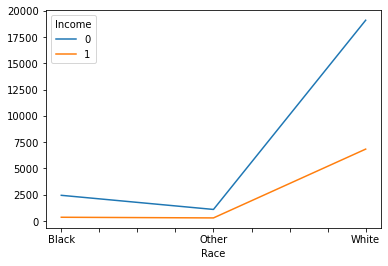

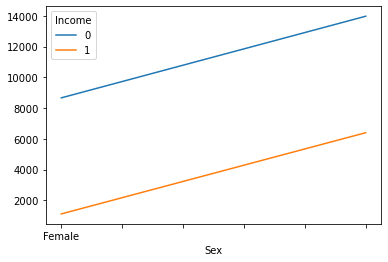

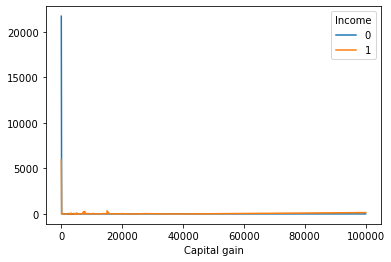

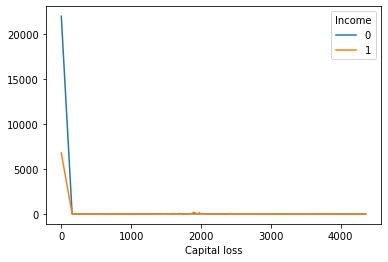

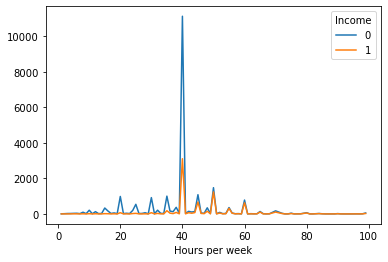

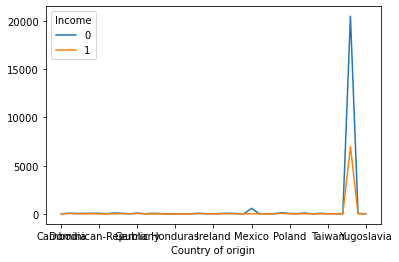

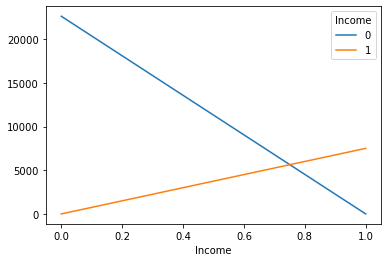

In [55]:
def relations(df, df1):
    '''Shows relationships between variables and target using crosstab
    '''
    for i in df:
        crosstab = pd.crosstab(data[i], data['Income'])
        crosstab.plot()
        plt.show()
relations(data, data['Income'])

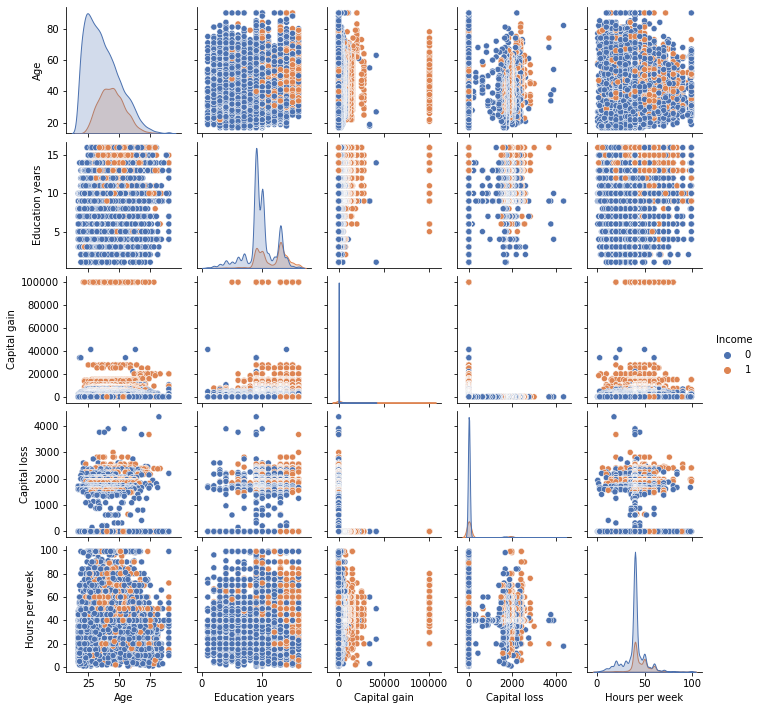

In [56]:
# Below we can observe another way of displaying relationship in a dataset

sns.pairplot(data, hue='Income', palette='deep', height=2.0, diag_kind='kde')
plt.show()

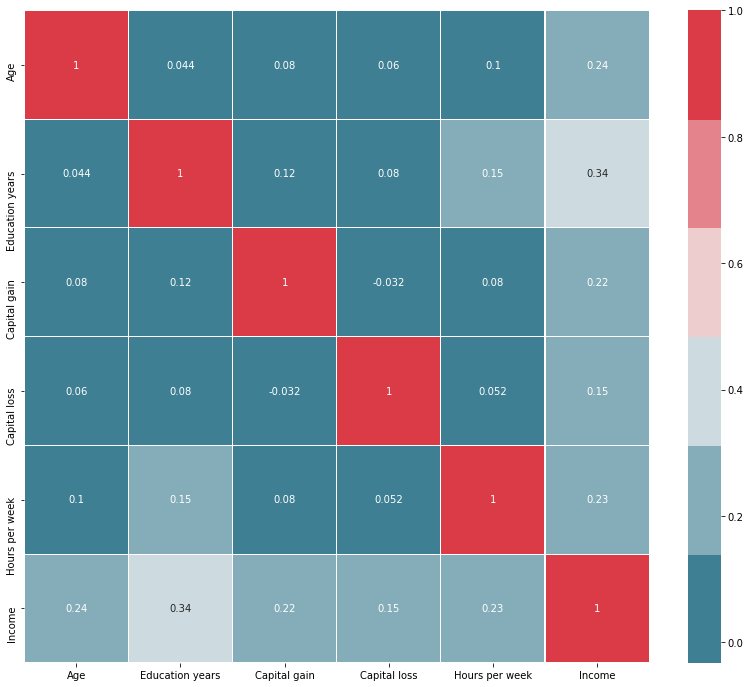

In [57]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(220,10), ax=ax, annot=True, linewidths=0.1,
                                                   vmax=1.0, linecolor='white')
plt.show()

As we can see above there are not strong correlation betwenn variables.

# Feature engineering

In order to use machine learning algorithms we need to convert all categorical data to numerical.

First I am going to divide Age, Education years, Hours per week, Capital gain and Capital loss to five intervals (bins). The goal is to simplify data.

In [58]:
def pd_cut(df):
    '''
    Function divides Age, Education years, Hours per week, 
    Capital gain and Capital loss to five 
    intervals (bins). The goal is to simplify data.
    '''
    columns = ['Age','Education years', 'Hours per week', 'Capital gain', 'Capital loss']
    for col in columns:
        df[col] = pd.cut(df[col],5)
        print(df[col].value_counts())
pd_cut(data)

(31.6, 46.2]      11685
(16.927, 31.6]    10443
(46.2, 60.8]       6221
(60.8, 75.4]       1630
(75.4, 90.0]        169
Name: Age, dtype: int64
(7.0, 10.0]     16883
(10.0, 13.0]     7358
(13.0, 16.0]     2544
(4.0, 7.0]       2323
(0.985, 4.0]     1040
Name: Education years, dtype: int64
(20.6, 40.2]     18572
(40.2, 59.8]      6737
(0.902, 20.6]     2383
(59.8, 79.4]      2141
(79.4, 99.0]       315
Name: Hours per week, dtype: int64
(-99.999, 19999.8]    29916
(79999.2, 99999.0]      148
(19999.8, 39999.6]       82
(39999.6, 59999.4]        2
(59999.4, 79999.2]        0
Name: Capital gain, dtype: int64
(-4.356, 871.2]     28747
(1742.4, 2613.6]      940
(871.2, 1742.4]       443
(2613.6, 3484.8]       11
(3484.8, 4356.0]        7
Name: Capital loss, dtype: int64


Next step is to convert categorical data into numerical. In order to do it I'm going to use LabelEncoder.

In [59]:
def convert(df):
    '''
    Function converts categorical data
    into numerical using LabelEncoder
    '''
    columns = data.columns
    label = LabelEncoder()
    for cols in columns:
        df[cols] = label.fit_transform(df[cols])
convert(data)

In [60]:
data.head()

,Age,Workclass,Education,Education years,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Country of origin,Income
1,4,0,11,2,4,2,1,2,0,0,4,0,38,0
3,2,0,5,0,0,5,4,2,0,0,4,1,38,0
4,1,0,15,2,3,8,3,2,0,0,4,1,38,0
5,1,0,11,2,0,6,4,2,0,0,4,2,38,0
6,1,0,0,1,3,0,4,2,1,0,4,1,38,0


I'm going to get to know which features are the most important for the model. I will use Feature Importance from Random Forest.

First I will divide data into X (features) and y (target variable)

In [61]:
X = data.drop('Income', axis=1)
y = data['Income']

In [62]:
X.shape, y.shape

((30148, 13), (30148,))

In [63]:
X.head() 

,Age,Workclass,Education,Education years,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Country of origin
1,4,0,11,2,4,2,1,2,0,0,4,0,38
3,2,0,5,0,0,5,4,2,0,0,4,1,38
4,1,0,15,2,3,8,3,2,0,0,4,1,38
5,1,0,11,2,0,6,4,2,0,0,4,2,38
6,1,0,0,1,3,0,4,2,1,0,4,1,38


In [64]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: Income, dtype: int64

Next I'am dividing data into train and test

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [66]:
def feature_importance(x,y):
    '''
    Function assign score to features based
    on how they are useful in predicting target variable.
    It uses Random Forest Classifier
    '''
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
    importances = importances.sort_values(by='Importance', ascending=False)
    print(importances.head(20))
feature_importance(X,y)

              Feature  Importance
6        Relationship    0.166757
5          Occupation    0.150757
3     Education years    0.118184
0                 Age    0.110302
4      Marital status    0.096007
2           Education    0.089053
11     Hours per week    0.081400
1           Workclass    0.050046
10       Capital loss    0.037479
12  Country of origin    0.036086
7                Race    0.027814
8                 Sex    0.020037
9        Capital gain    0.016078


# Building machine learning models

In [67]:
def ml_models(x,y):
    '''
    Function defines, train, make predictions and display scores
    for machine learning models such as: Stochastic Gradient Descent,
    Random Forest, Logistic Regression, KNN, Perceptron, Support Vector Classifier 
    and Decision Tree.
    '''
    sgd = SGDClassifier(max_iter=5, tol=None)
    rf = RandomForestClassifier(n_estimators=100)
    lr = LogisticRegression()
    knn = KNeighborsClassifier(n_neighbors=3)
    perceptron = Perceptron(max_iter=5)
    svc = LinearSVC()
    tree = DecisionTreeClassifier()
    models = [sgd, rf, lr, knn, perceptron, svc, tree]
    
    for model in models:
        model.fit(X_train, y_train)
        model.predict(X_test)
        score = model.score(X_train, y_train)
        print(score)
ml_models(X,y)

0.3981690327716598
0.9055769315819734
0.8013356330989342
0.8554243509796117
0.7635664057317235
0.5005086020078723
0.9056211578435275


# Hyperparameter tuning

I will try to improve results among best model: Decision Tree 

In [68]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [69]:
# Decision Tree parameters

param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[1,5,10,25,50,70],
             'min_samples_leaf':[1,5,10,15,20,50]}
grid = GridSearchCV(estimator=tree, param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}

I will teach model once again using best parameters

In [70]:
tree_grid = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20)
tree_grid.fit(X_train, y_train)
tree_grid.predict(X_test)
tree_grid_score = tree.score(X_train, y_train)
print(tree_grid_score)

0.9056211578435275


# Model evaluation

I will evaluate the best model - Decision Tree

Confusion Matrix

In [71]:
predictions = cross_val_predict(tree_grid, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[15523,  1511],
       [ 2335,  3242]], dtype=int64)

15523 - correct classified as people who didn't earn above 50k yearly

1511 - wrong classified as people who didn't earn above 50k yearly

2335 - correct classified as people who earned above 50k yearly

3242 - wrong classified as people who earned above 50k yearly

Precison and Recall

In [72]:
print('Precision:', precision_score(y_train, predictions))

Precision: 0.6820955186198191


In [73]:
print('Recall:', recall_score(y_train, predictions))

Recall: 0.5813161197776583


In [74]:
y_scores = tree.predict_proba(X_train)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_train, y_scores)

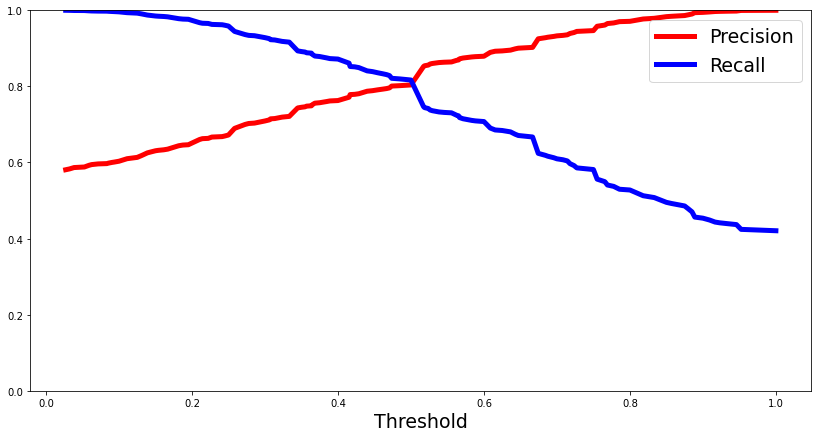

In [75]:
plt.figure(figsize=(14,7))
plt.plot(threshold, precision[:-1], 'r-', label='Precision', linewidth=5)
plt.plot(threshold, recall[:-1], 'b', label='Recall', linewidth=5)
plt.xlabel('Threshold', fontsize=19)
plt.legend(loc='upper right', fontsize=19)
plt.ylim([0,1])
plt.show()

F-score

In [76]:
print('F-score:', f1_score(y_train, predictions))

F-score: 0.6276863504356244


ROC AUC Score

In [77]:
r_a_score = roc_auc_score(y_train, y_scores)
print('ROC-AUC Score:', r_a_score)

ROC-AUC Score: 0.9696625481435951


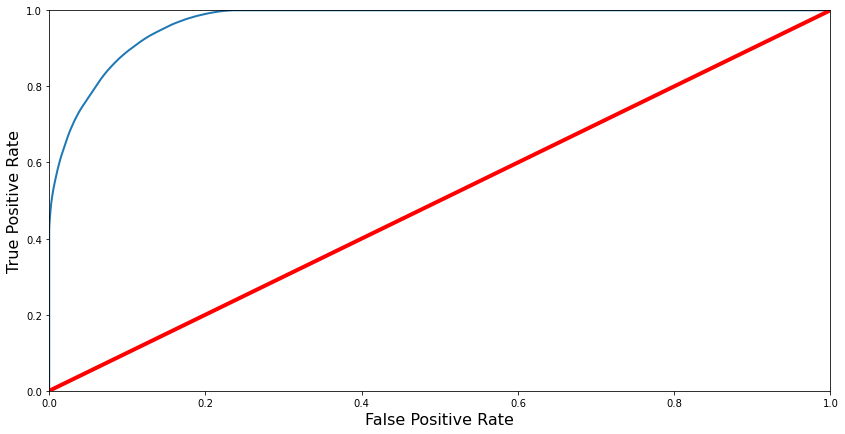

In [78]:
plt.figure(figsize=(14,7))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
plt.plot([0,1],[0,1], 'r', linewidth=4)
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()